In [1]:
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt
import numpy as np

### Test GPUs

In [2]:
print(f"GPUs: { len( tf.config.list_physical_devices('GPU') ) }")

GPUs: 2


### Reding the Data

In [3]:
w_dir = pathlib.Path('/home/antirrabia/Documents/DeepLearnin/DATASETS/CatsVsDogs/cats_vs_dogs_small/')

In [4]:
tr_d = image_dataset_from_directory(
    w_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

va_d = image_dataset_from_directory(
    w_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

te_d = image_dataset_from_directory(
    w_dir / 'test',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


### Importin VGG16

In [6]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,  
)

canv_base.trainable = False

### Get new features

In [12]:
def get_new_features(d_set):
    new_features = []
    lables = []
    
    for image, l in d_set:
        preprocessed_images = keras.applications.vgg16.preprocess_input(image)
        
        features = conv_base.predict(preprocessed_images)
        
        new_features.append(features)
        lables.append(l)
        
    return np.concatenate(new_features), np.concatenate(lables) 

In [13]:
tr_fe, tr_l = get_new_features(tr_d)
va_fe, va_l = get_new_features(va_d)
te_fe, te_l = get_new_features(te_d)

1/1 [==============================] - 0s 23ms/step


### New training shape

In [14]:
tr_fe.shape

(2000, 5, 5, 512)

### Model

In [15]:
inputs = keras.Input(shape=(5,5,512))

x = layers.Flatten()(inputs)

x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

### Compile

In [18]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

### Fitting

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='CatsVsDogs_preTrained(fast).keras',
        save_best_only=True,
        monitor='val_loss'
    )
]


history = model.fit(
    tr_fe, tr_l,
    epochs=20,
    validation_data=(va_fe, va_l),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 22.1119 - accuracy: 0.9245 - val_loss: 3.9045 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 2.9005 - accuracy: 0.9735 - val_loss: 4.3157 - val_accuracy: 0.9690
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 3.3346 - accuracy: 0.9810 - val_loss: 5.2232 - val_accuracy: 0.9700
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5882 - accuracy: 0.9935 - val_loss: 7.4264 - val_accuracy: 0.9680
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 1.8280 - accuracy: 0.9875 - val_loss: 3.7569 - val_accuracy: 0.9750
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.7835 - accuracy: 0.9945 - val_loss: 4.7682 - val_accuracy: 0.9700
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5492 - accuracy: 0.9980 - val_loss: 4.0481 - val_accuracy: 0.9750
Epoch 8/20
63/63 

### Ploting the training

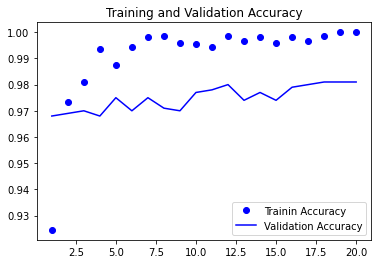

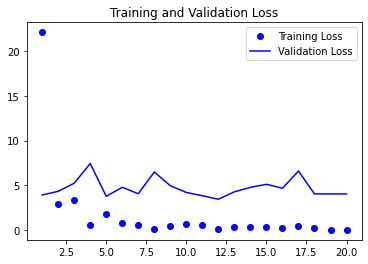

<Figure size 432x288 with 0 Axes>

In [20]:
# Accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len( accuracy ) + 1)

plt.plot(epochs, accuracy, 'bo', label='Trainin Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(), plt.figure();

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(), plt.figure();